In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../')
import classify
import utils

In [2]:
CALIBRATION_FILE = "../../calibration/out/cal_1_C_matrix.mat"
# TEST_FOLDER = "../../test/"
# TEST_FILE = TEST_FOLDER + "/sliding13.txt"
TEST_FOLDER = "../../experiment_data/"
# TEST_FILE = TEST_FOLDER + "/new_grass/both_sides_1.txt"
TEST_FILE = TEST_FOLDER + "/both_sides_4-18/5.txt"

DATA_FOLDER = "../../input/both_sides_4-18/"
CTL_FILES = DATA_FOLDER + "ctl*.csv" # No touch data
ACT_FILES = DATA_FOLDER + "act*.csv" # Touch data

In [3]:
utils.print_header(TEST_FILE)

%  Data file recorded 2016/4/18  11:40:14
%  Stride Frequency         = [9, 9]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [100, 0, 100, 0, 0, 100, 0, 100, 0, 0]



In [4]:
test_data = classify.get_test_data(TEST_FILE, CALIBRATION_FILE)

Index([u'time', u'Right Leg Pos', u'Left Leg Pos', u'Commanded Right Leg Pos',
       u'Commanded Left Leg Pos', u'DCR', u'DCL', u'GyroX', u'GyroY', u'GyroZ',
       u'AX', u'AY', u'AZ', u'RBEMF', u'LBEMF', u'VBatt', u'S1', u'S2', u'S3',
       u'S4', u'S5', u'S6', u'S7', u'S8'],
      dtype='object')


#### Experiment 13 Ground Truth: 3.20 seconds

### Random Forest Results

CTL size: 70 ACT size: 40


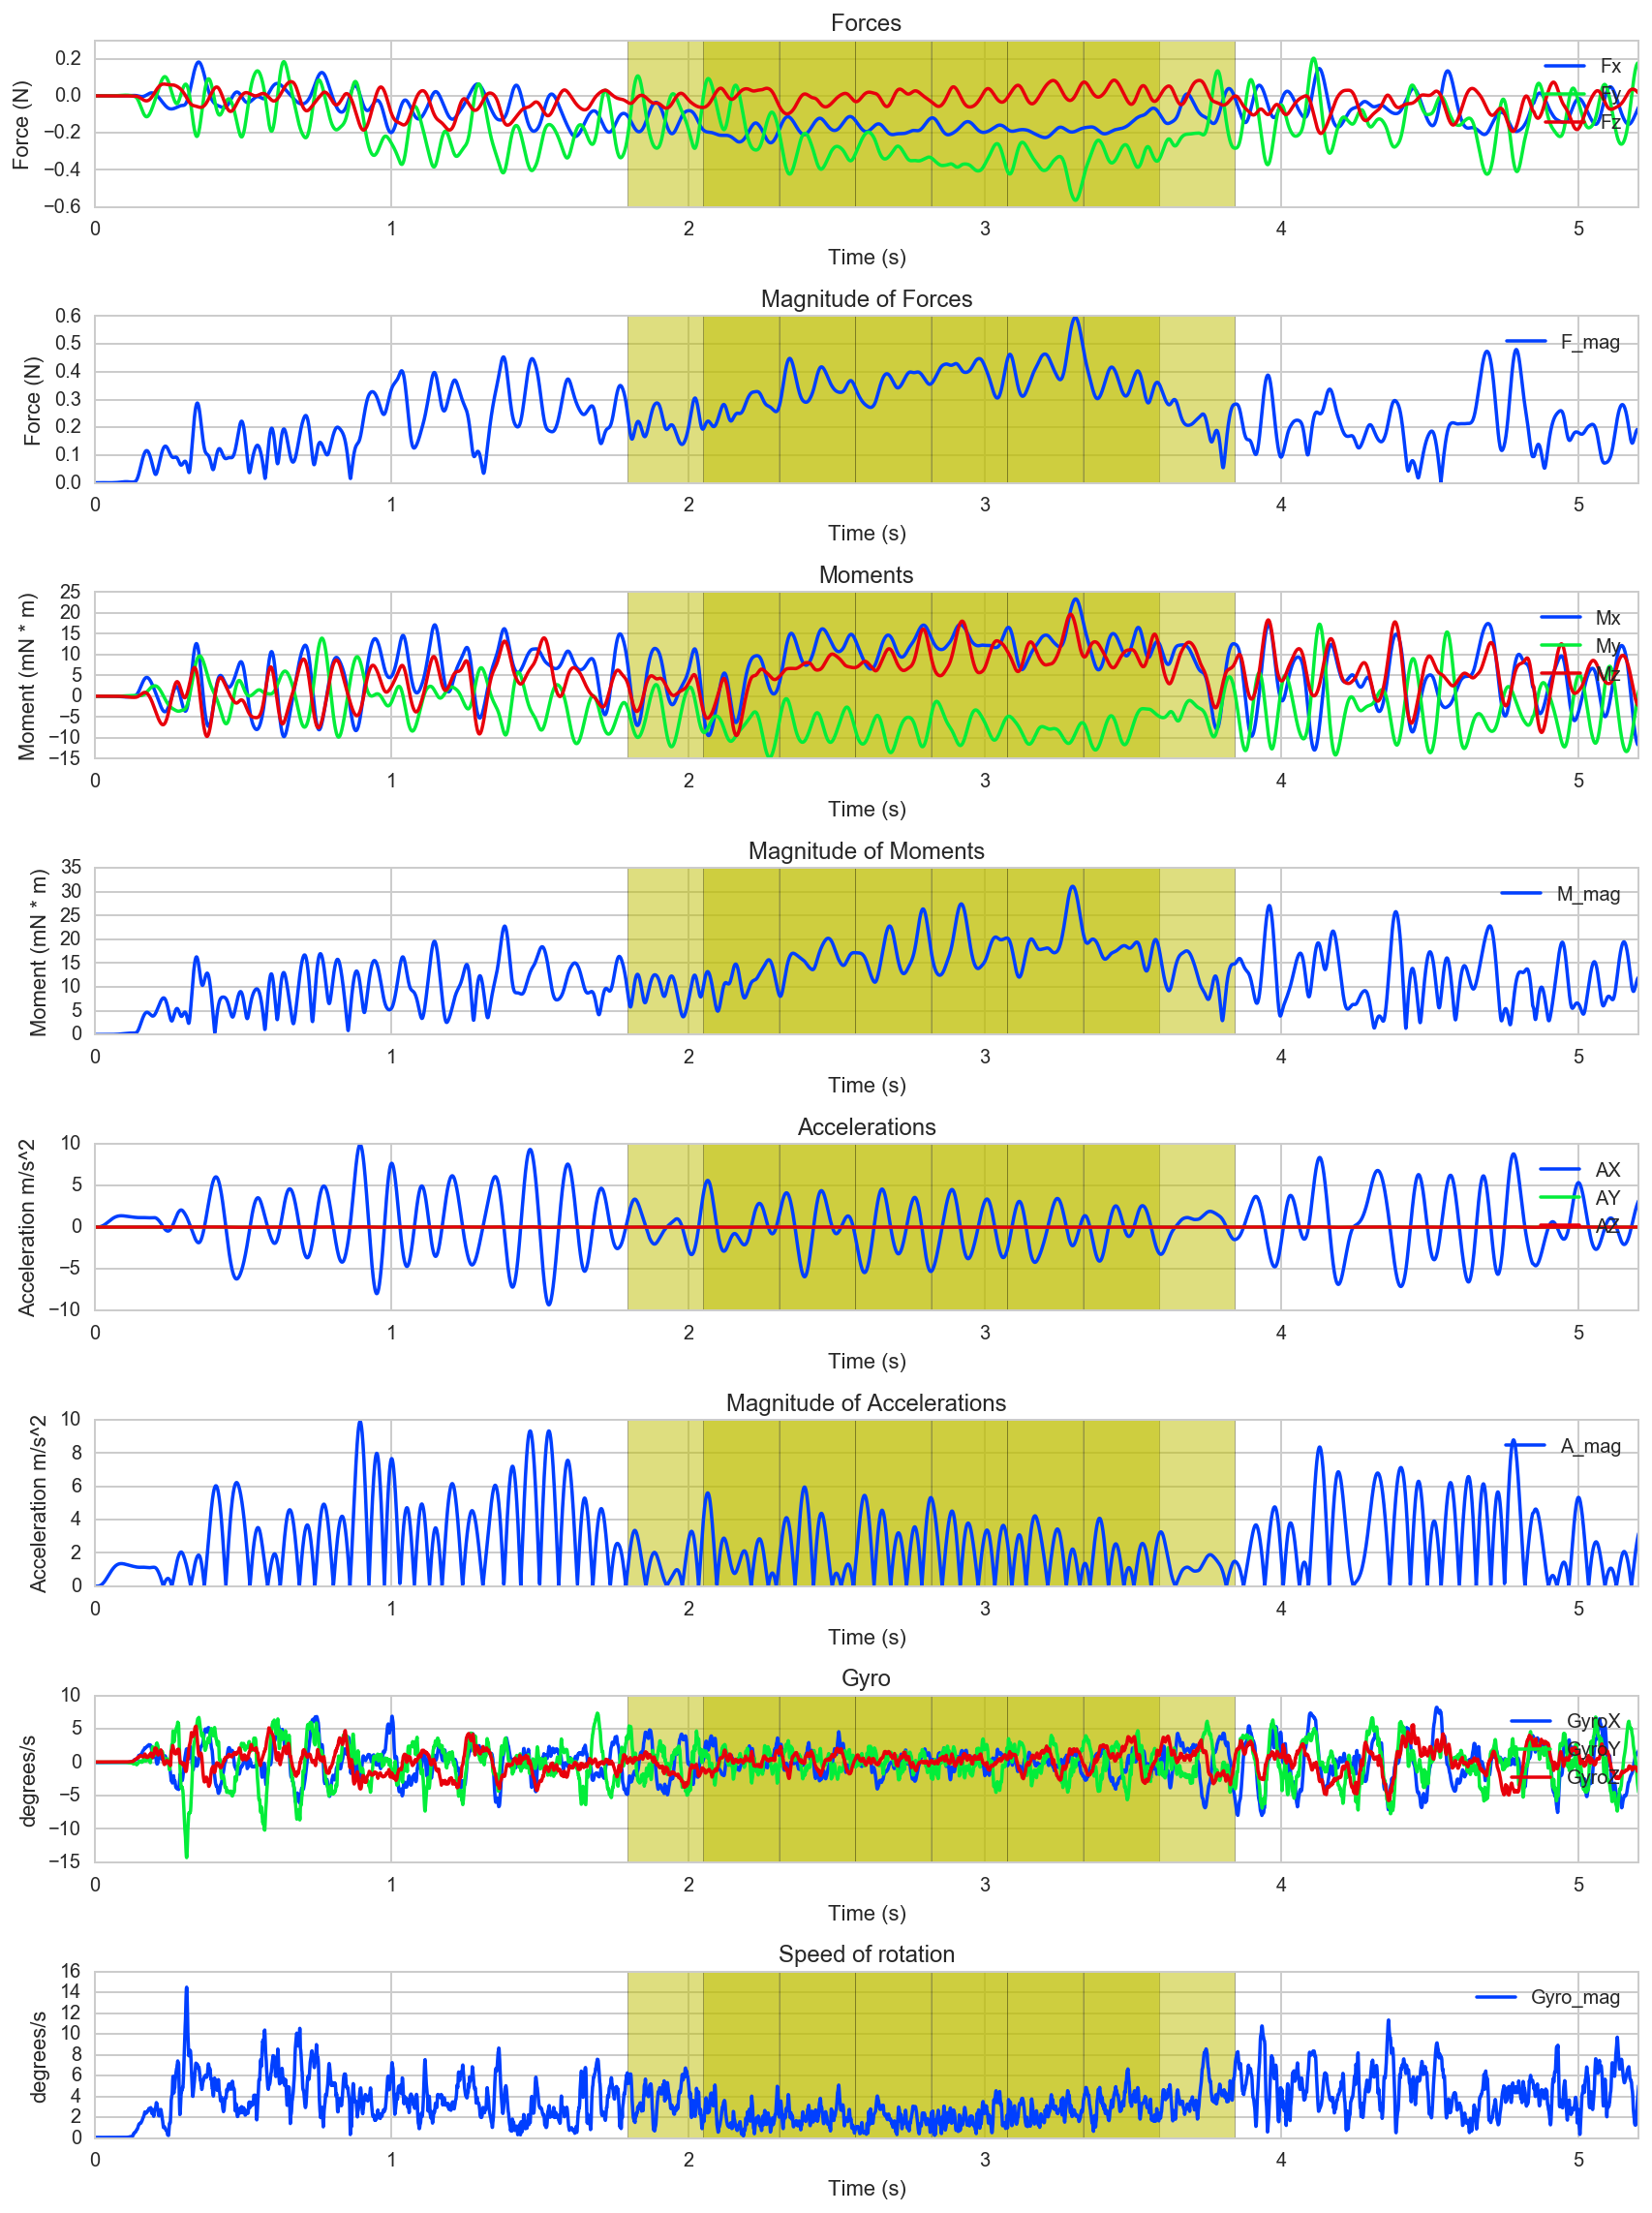

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [5]:
classify.clf_predict_and_visualize(classify.random_forests(), *test_data, ctl_files=CTL_FILES, act_files=ACT_FILES)

### Gradient Boosted Trees Results

CTL size: 70 ACT size: 40


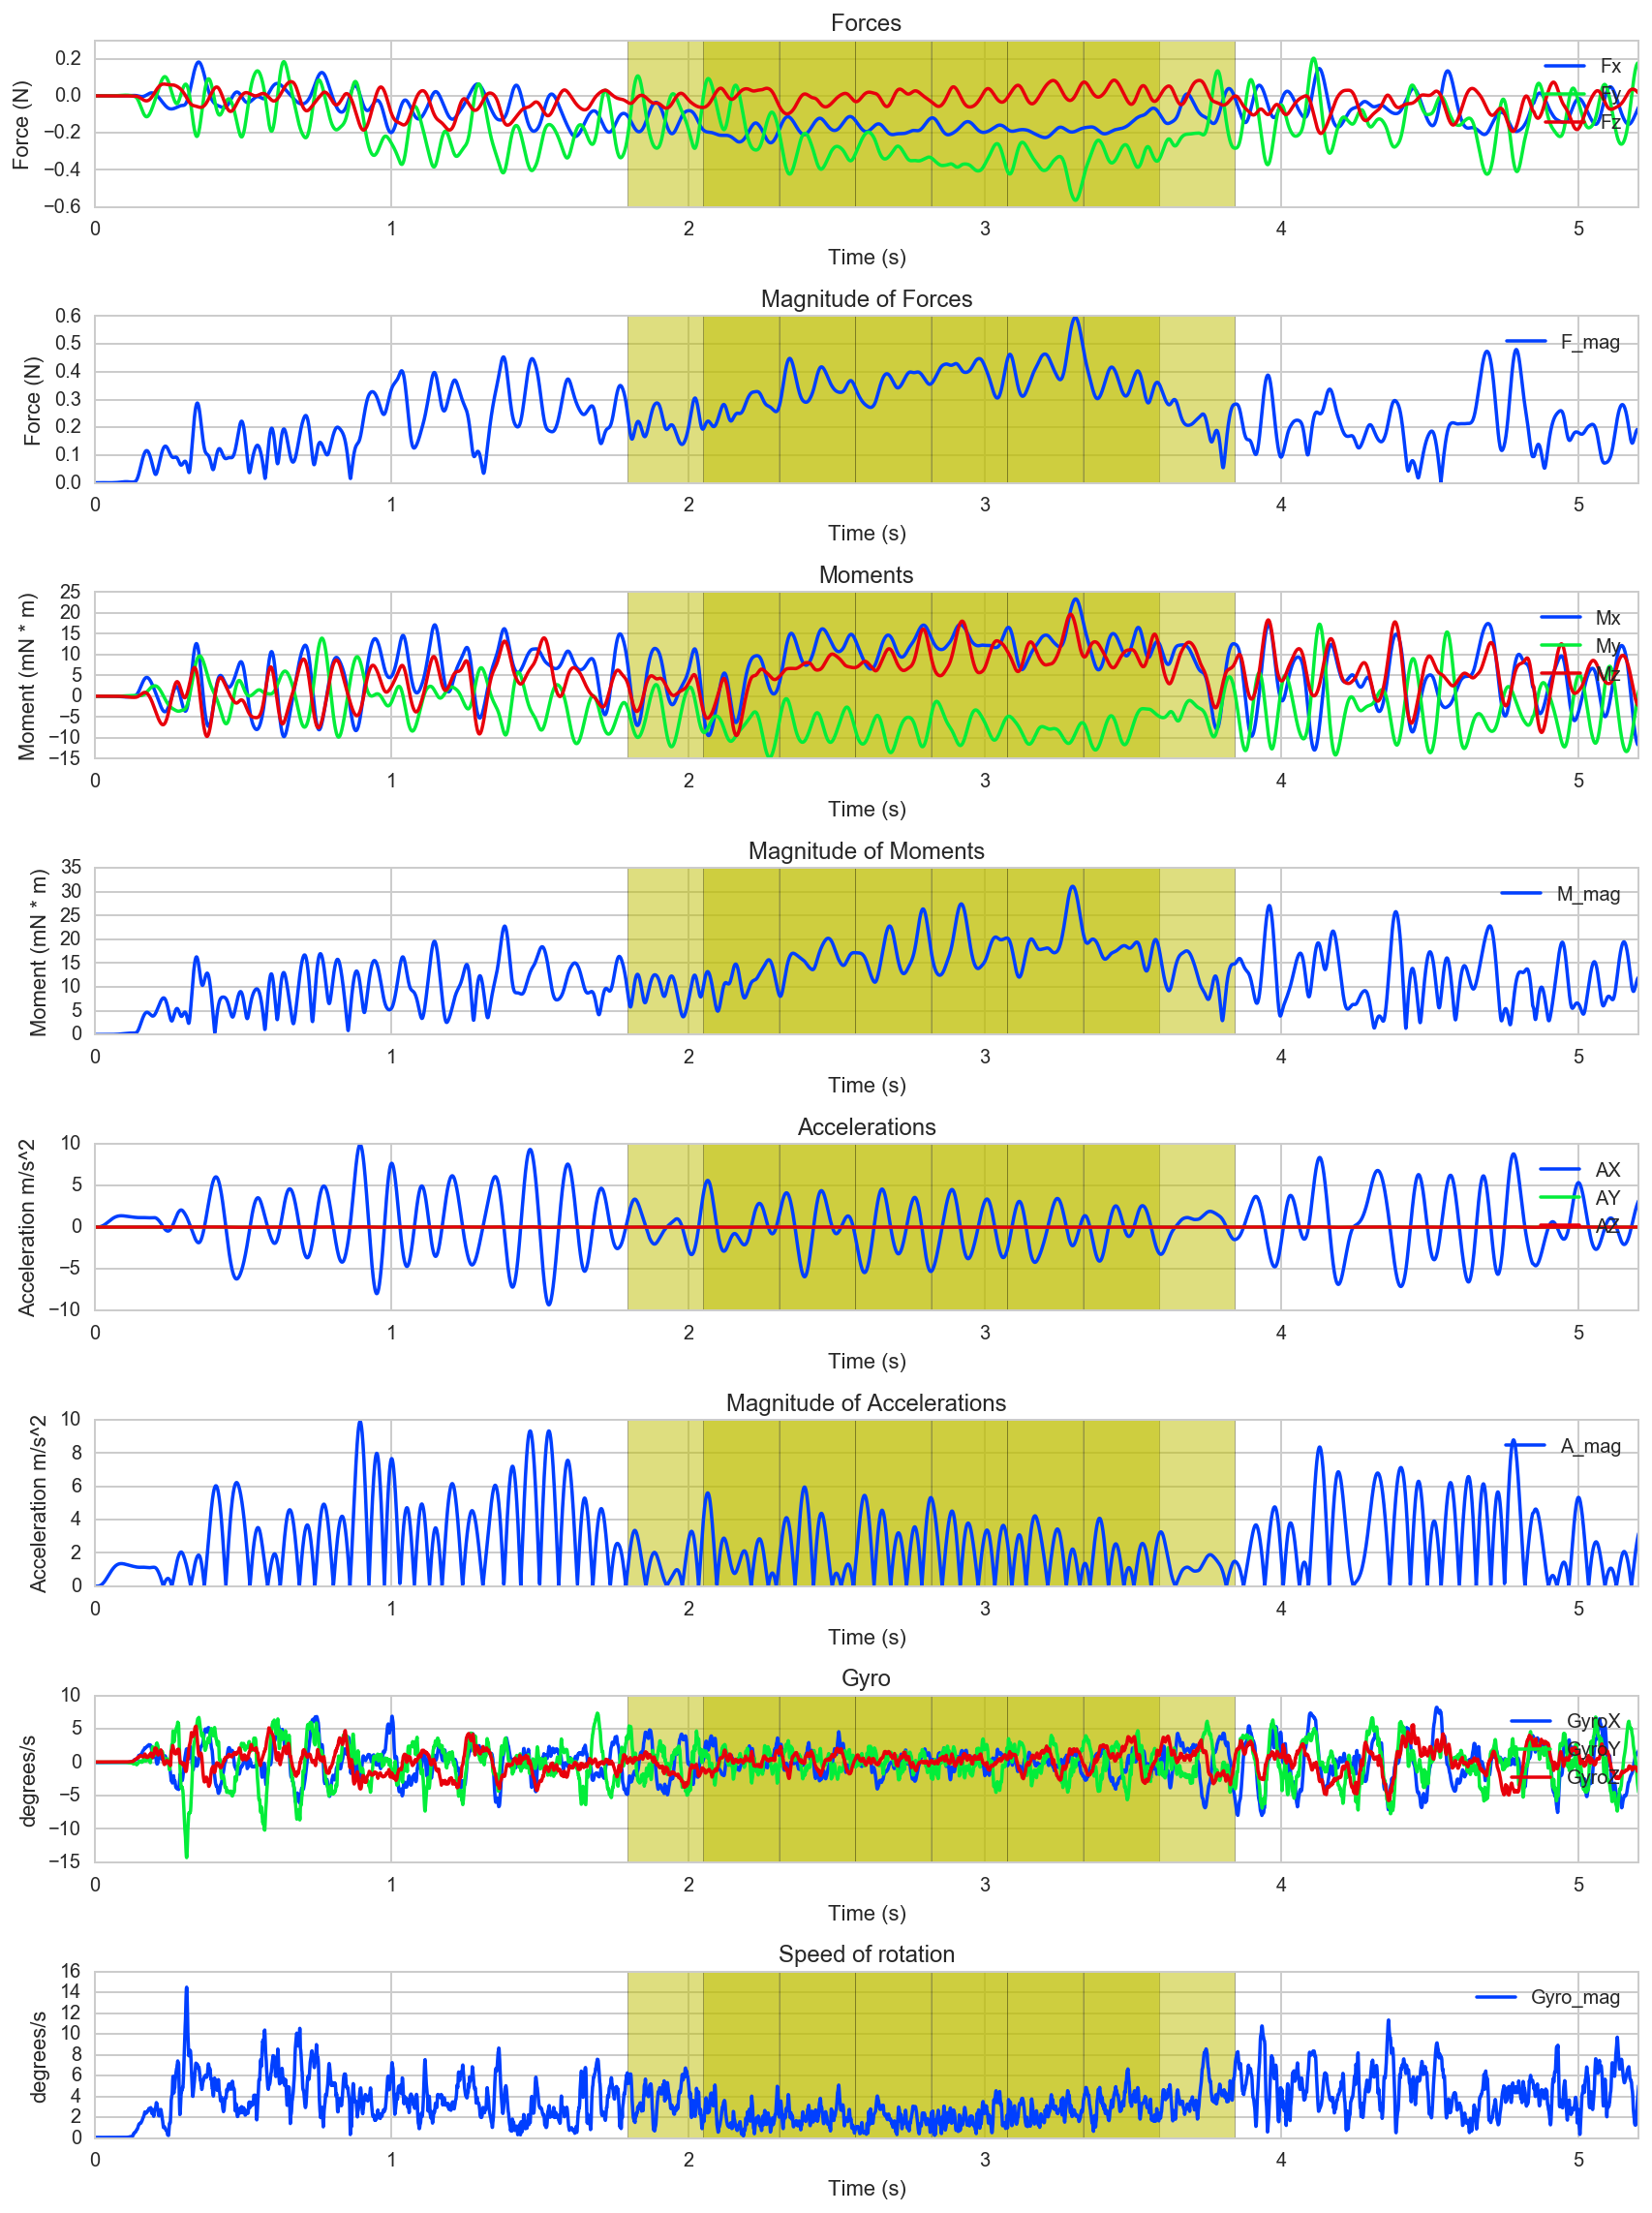

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [6]:
classify.clf_predict_and_visualize(classify.xgb_trees(), *test_data, ctl_files=CTL_FILES, act_files=ACT_FILES)

### Support Vector Machine Results

CTL size: 70 ACT size: 40


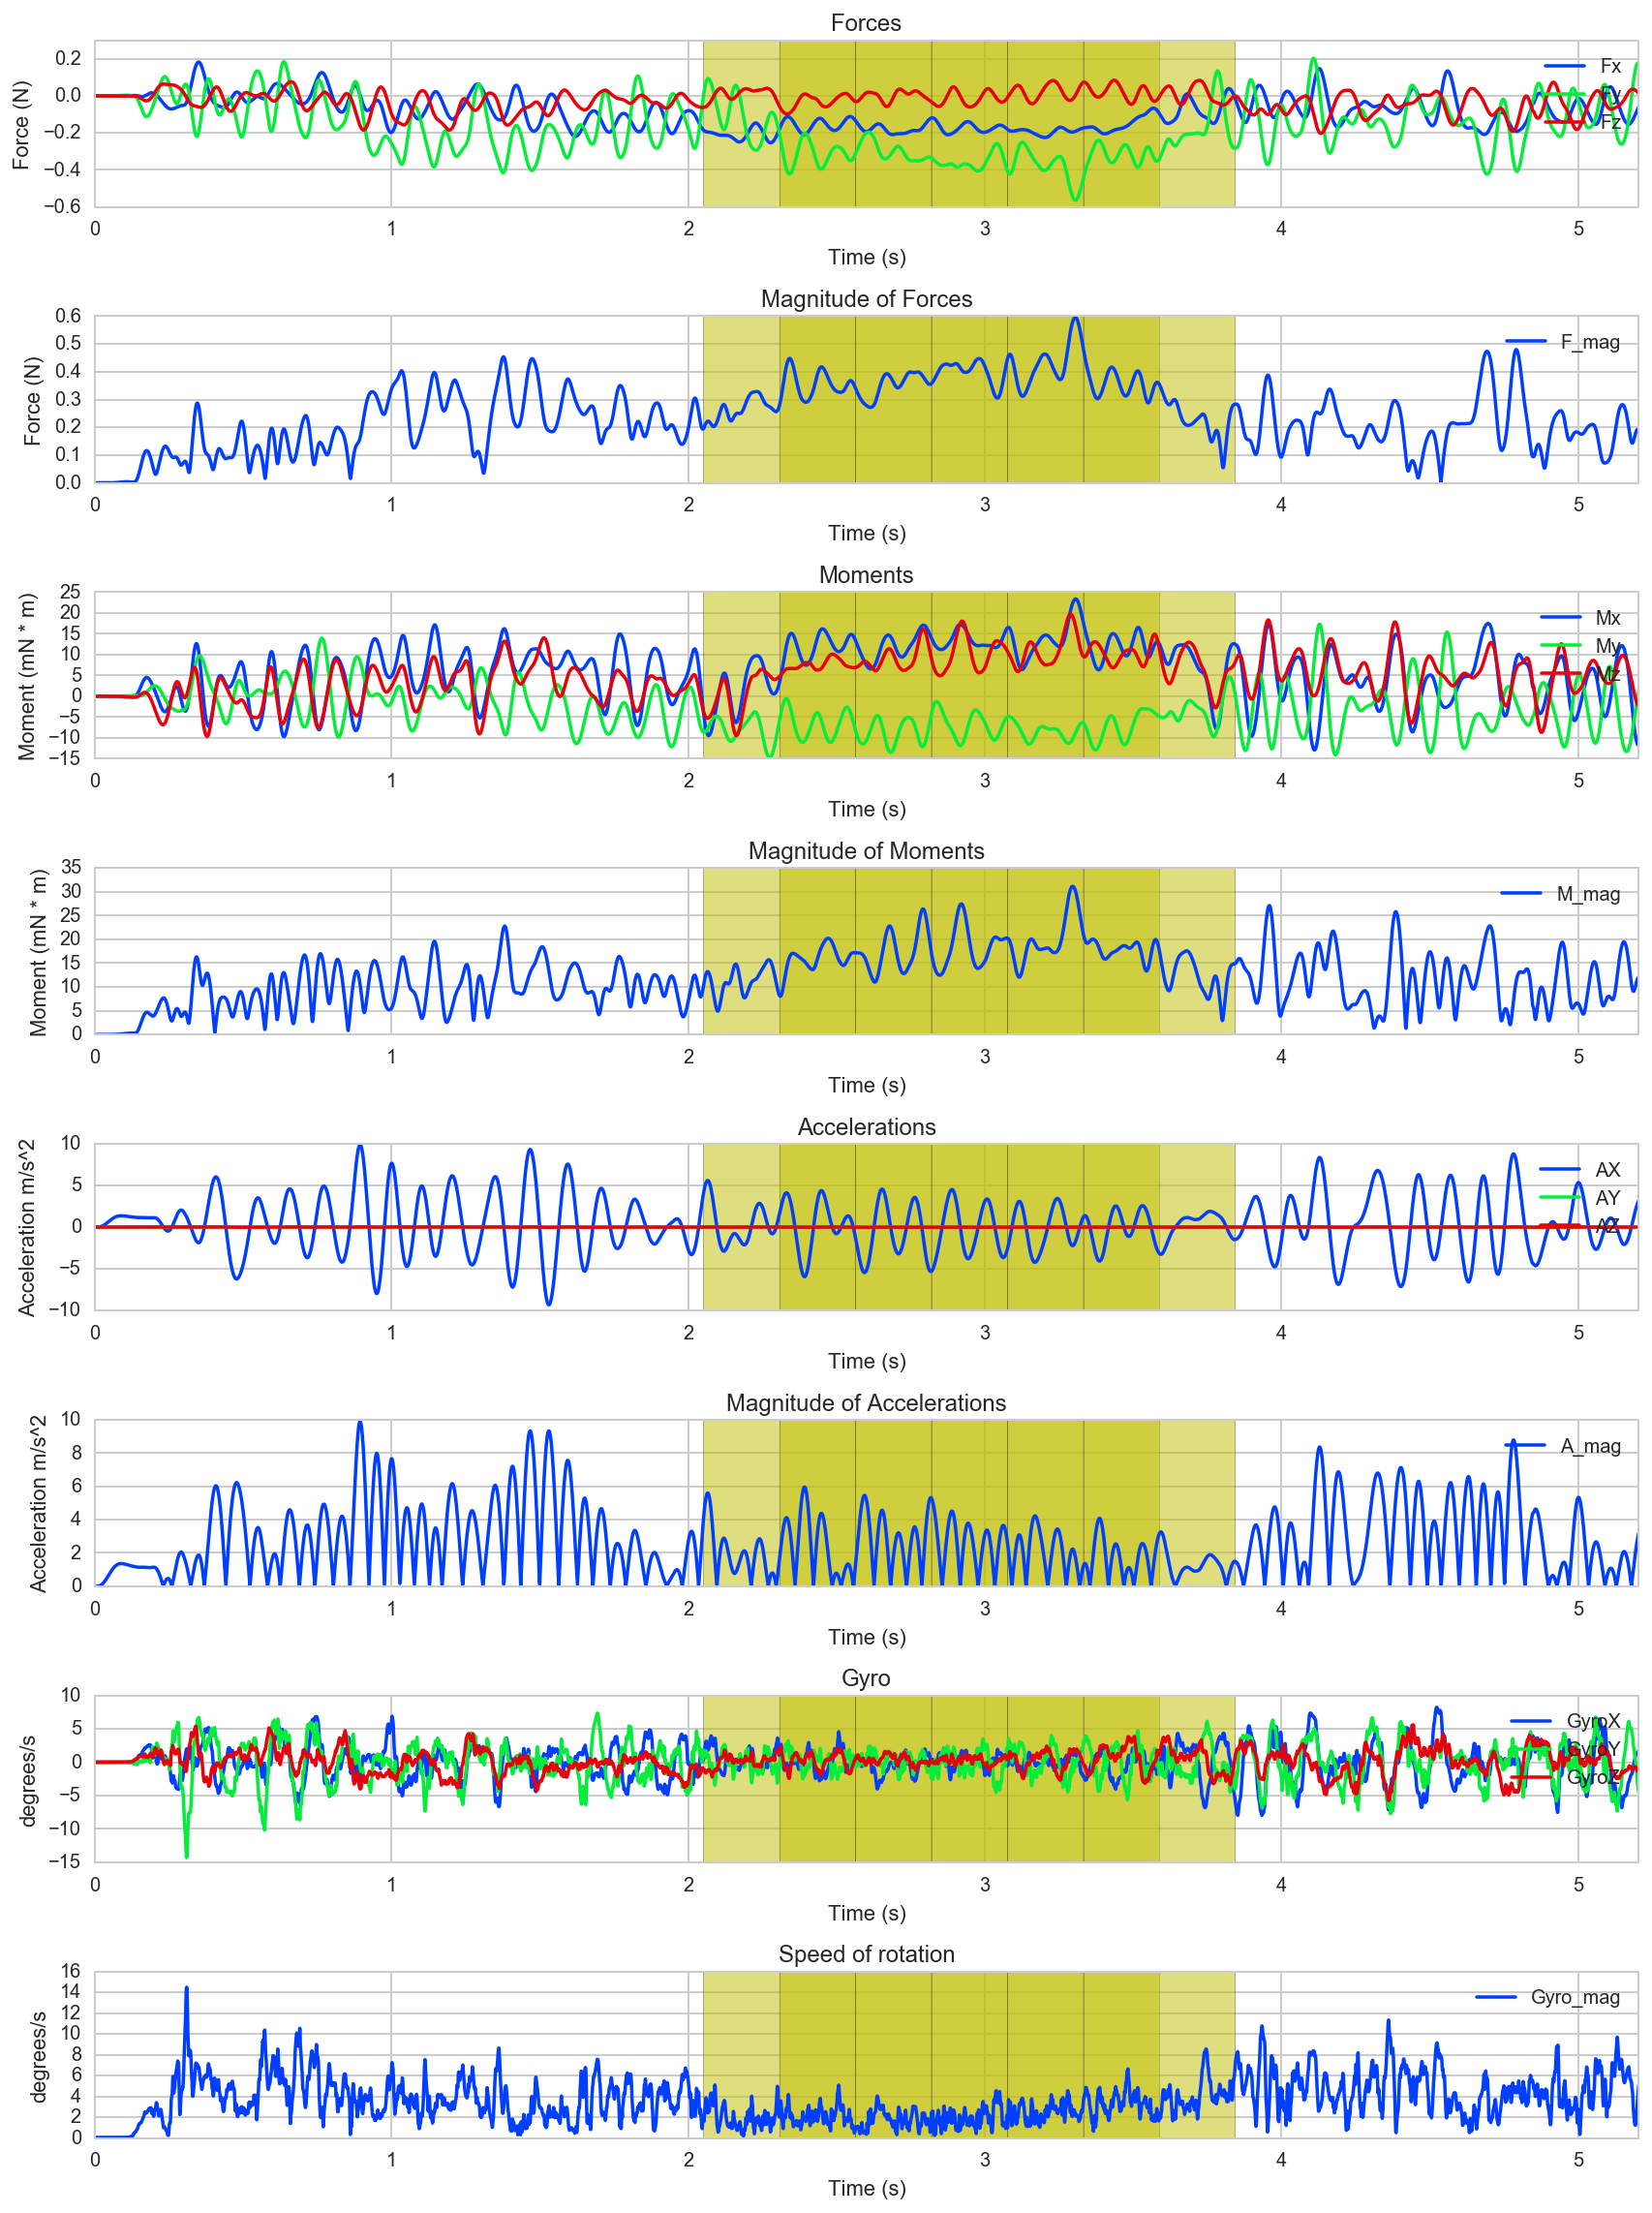

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [7]:
classify.clf_predict_and_visualize(classify.svc(), *test_data, ctl_files=CTL_FILES, act_files=ACT_FILES)

### Neural Net Results

CTL size: 70 ACT size: 40
Step #1, avg. loss: 1.17480
Step #201, epoch #100, avg. loss: 0.06279
Step #401, epoch #200, avg. loss: 0.00328
Step #601, epoch #300, avg. loss: 0.00136
Step #801, epoch #400, avg. loss: 0.00088
Step #1001, epoch #500, avg. loss: 0.00064
Step #1201, epoch #600, avg. loss: 0.00046
Step #1401, epoch #700, avg. loss: 0.00036
Step #1601, epoch #800, avg. loss: 0.00032
Step #1801, epoch #900, avg. loss: 0.00027


/usr/local/lib/python2.7/site-packages/skflow/io/data_feeder.py:217: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  out.itemset((i, self.y[sample]), 1.0)


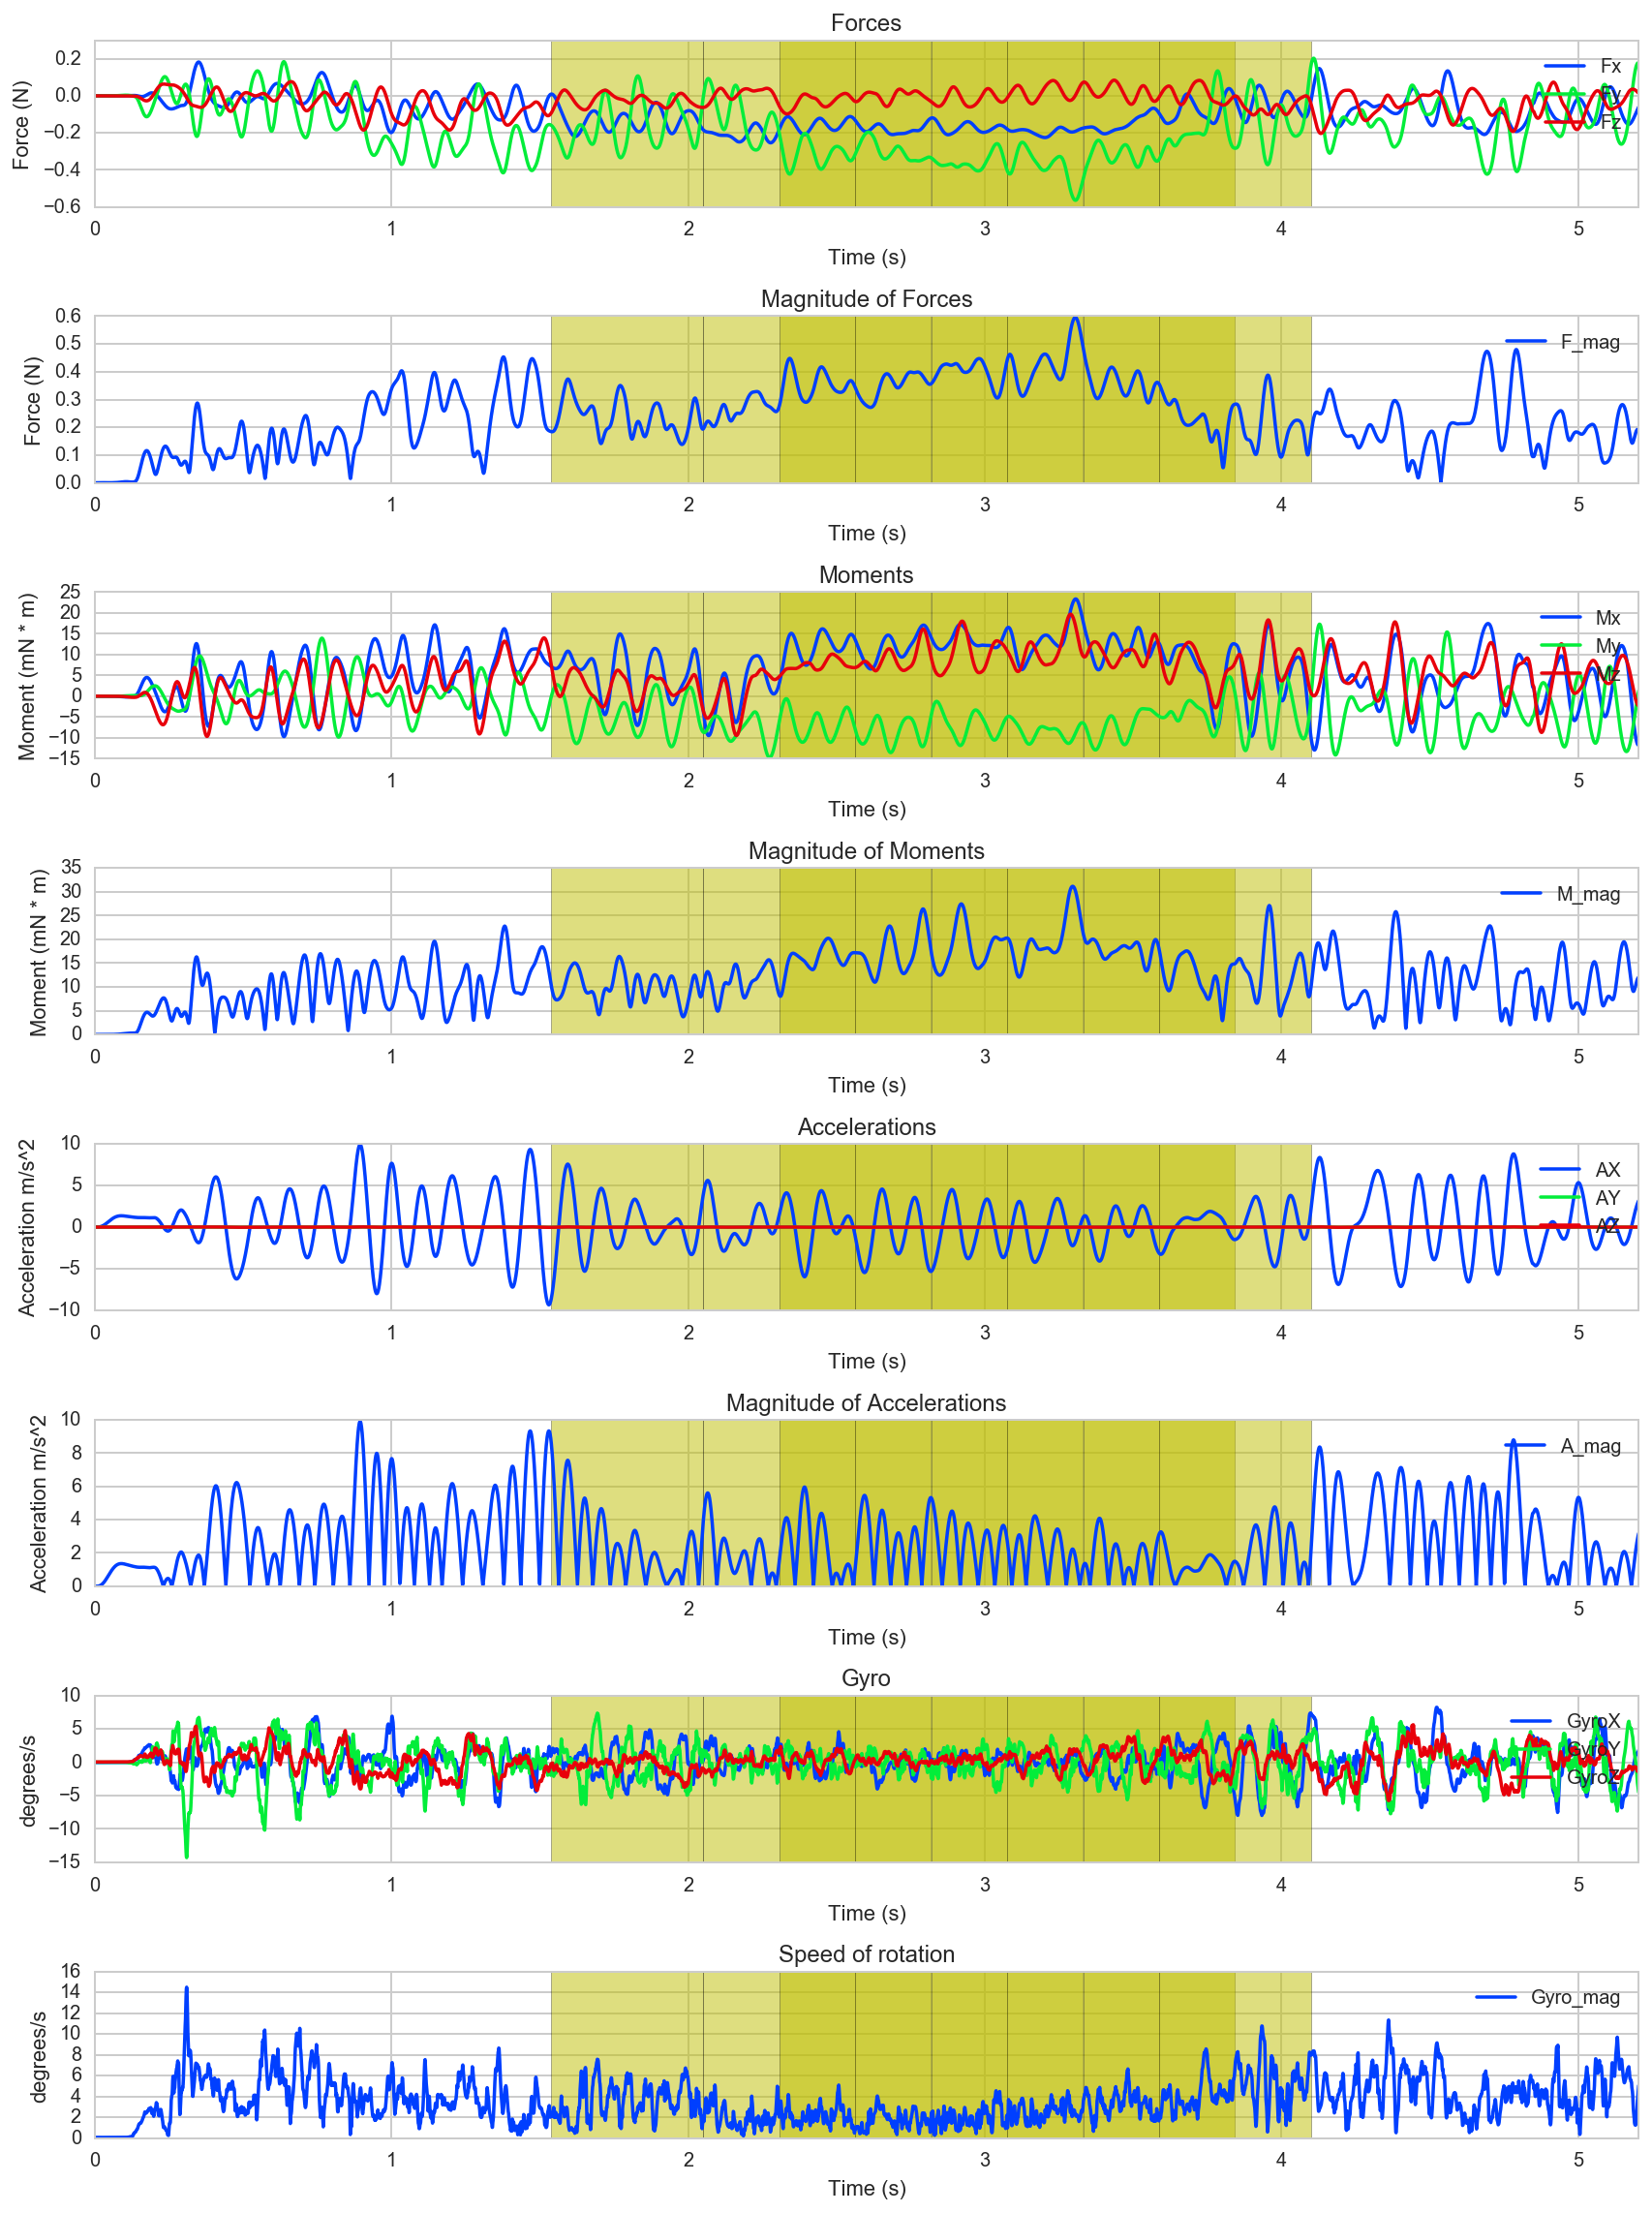

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [8]:
classify.clf_predict_and_visualize(classify.dnn(nn_steps=2000), *test_data, ctl_files=CTL_FILES, act_files=ACT_FILES)

### Ensemble Learning Results

CTL size: 70 ACT size: 40
Step #1, avg. loss: 1.16449
Step #201, epoch #100, avg. loss: 0.06208
Step #401, epoch #200, avg. loss: 0.00360
Step #601, epoch #300, avg. loss: 0.00134
Step #801, epoch #400, avg. loss: 0.00086
Step #1001, epoch #500, avg. loss: 0.00064
Step #1201, epoch #600, avg. loss: 0.00043
Step #1401, epoch #700, avg. loss: 0.00036
Step #1601, epoch #800, avg. loss: 0.00031
Step #1801, epoch #900, avg. loss: 0.00028


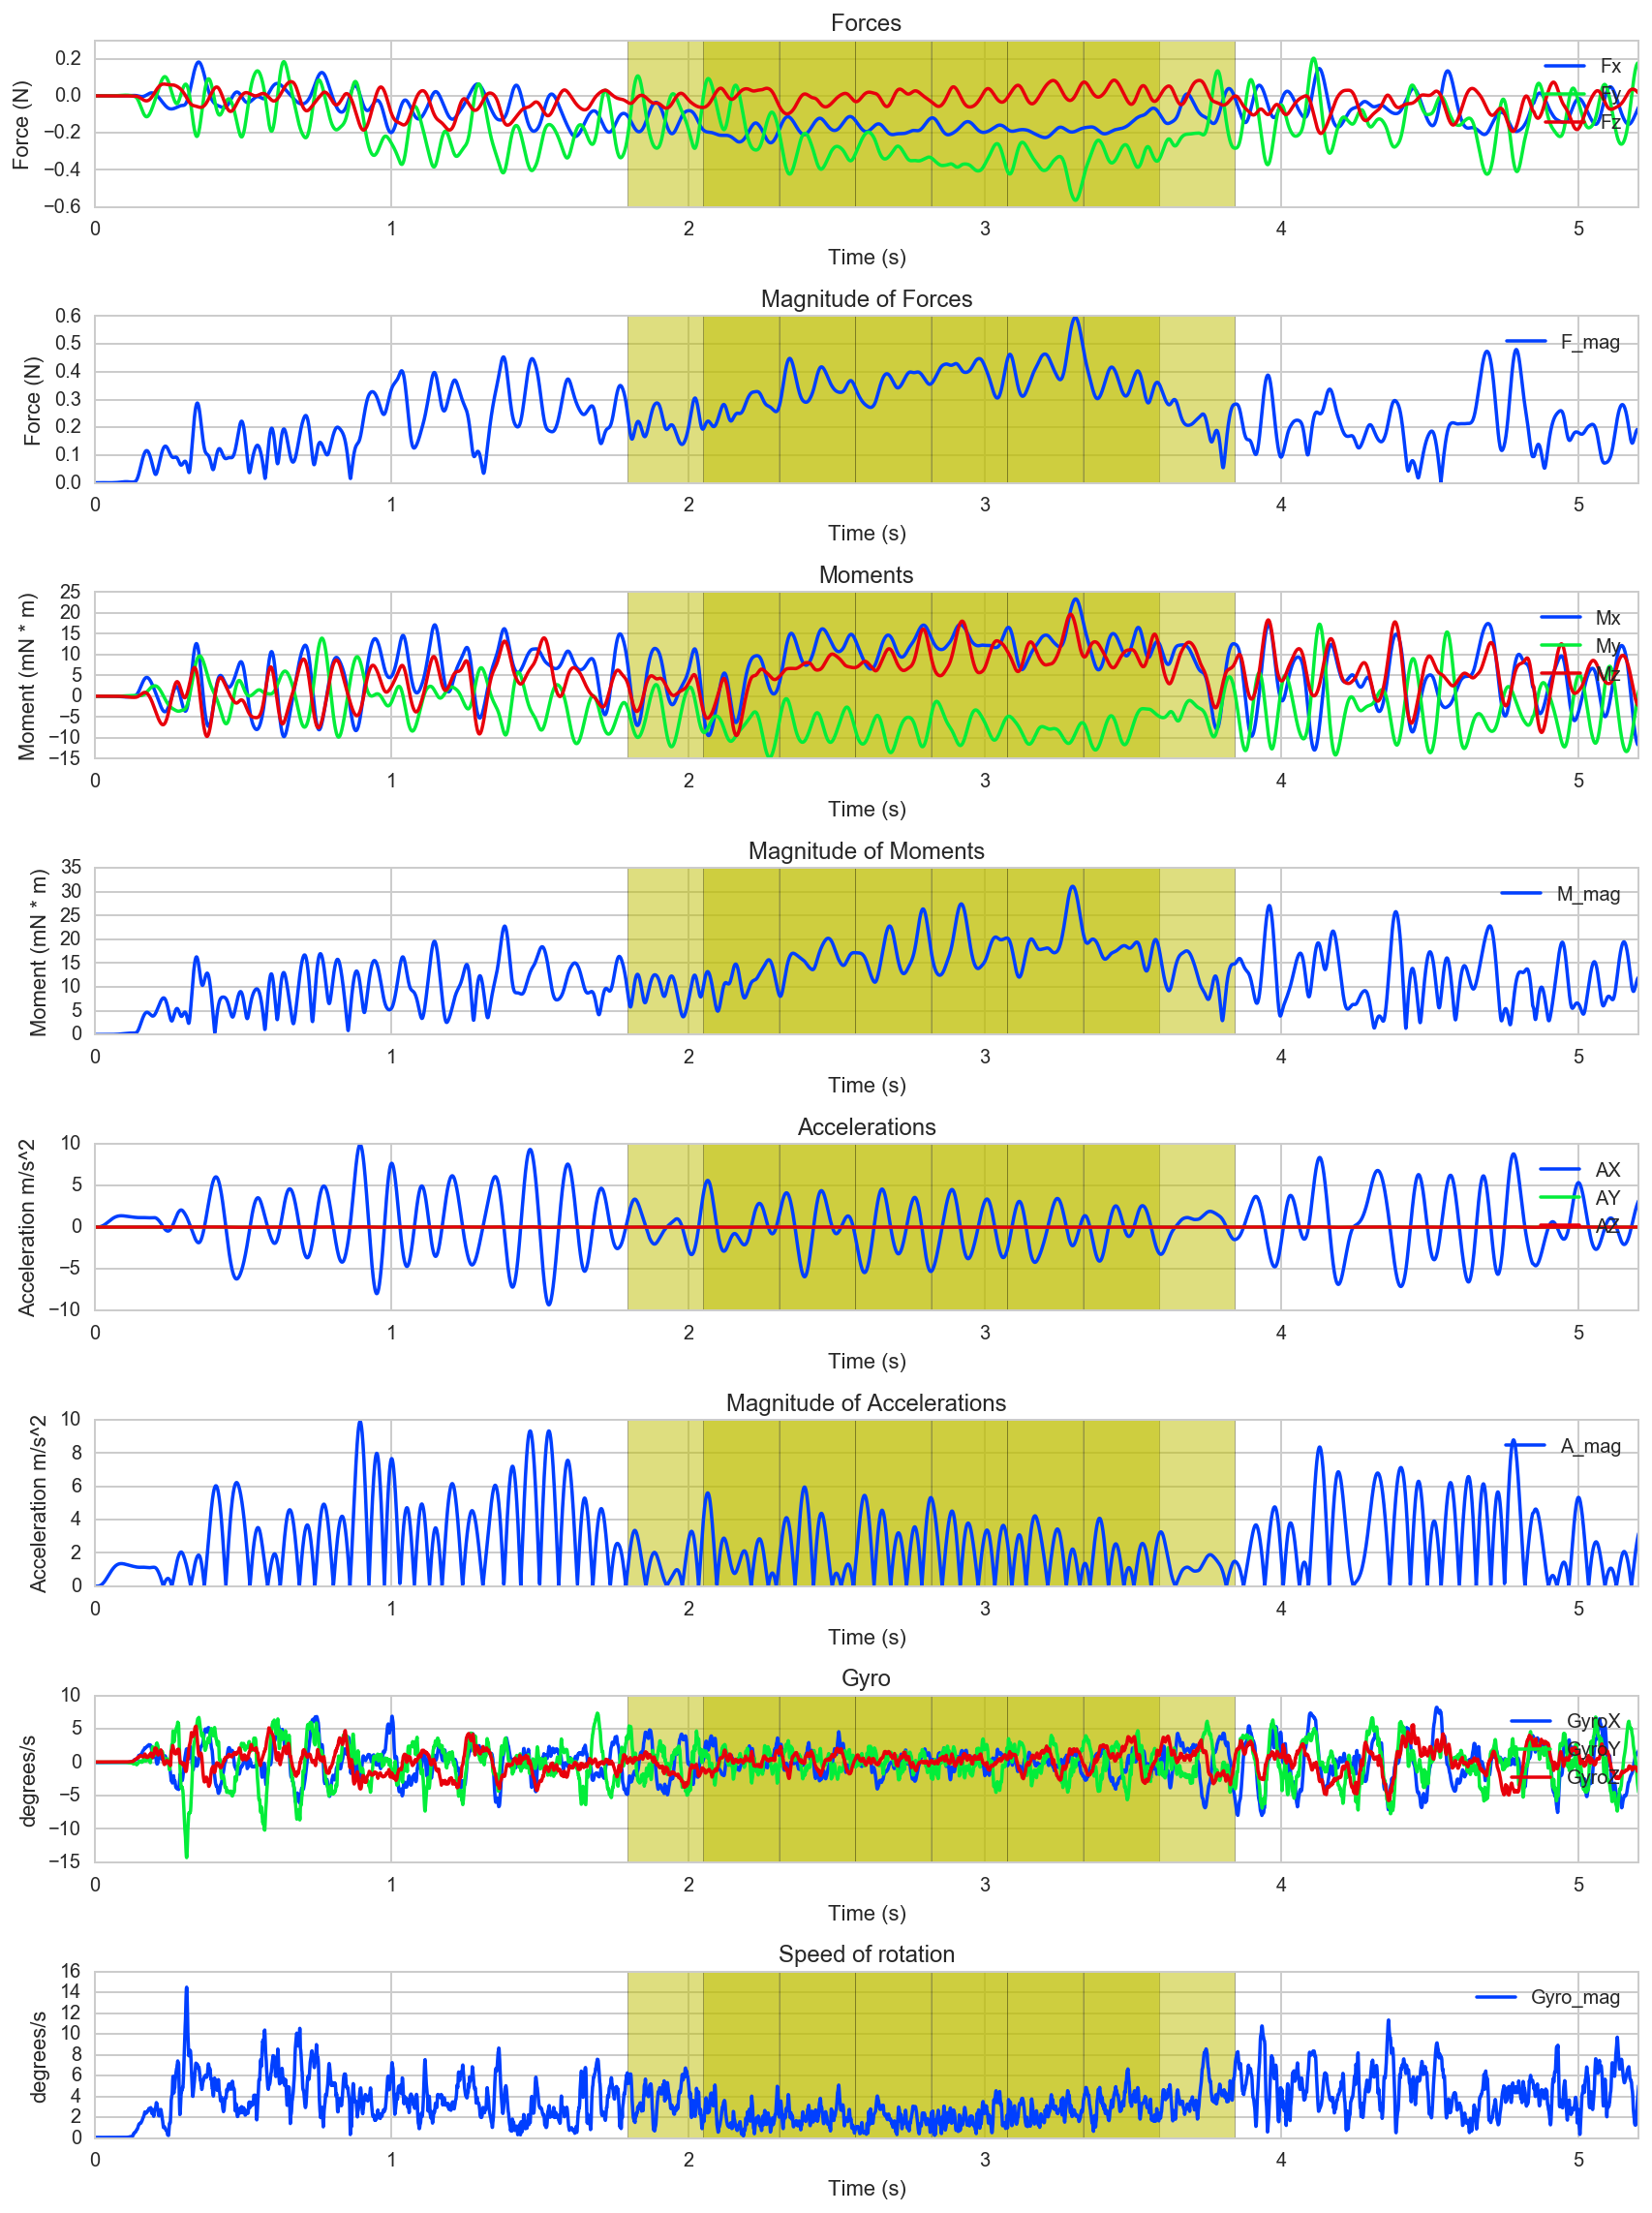

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [9]:
classify.clf_predict_and_visualize(classify.ensemble_clf(), *test_data, ctl_files=CTL_FILES, act_files=ACT_FILES)